In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
#Loading the dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
X = df.drop("MedHouseVal", axis=1)   # features
y = df["MedHouseVal"]                # target: Median house value

In [5]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
#MAE Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Absolute Error: 0.5332001304956553
R² Score: 0.5757877060324508


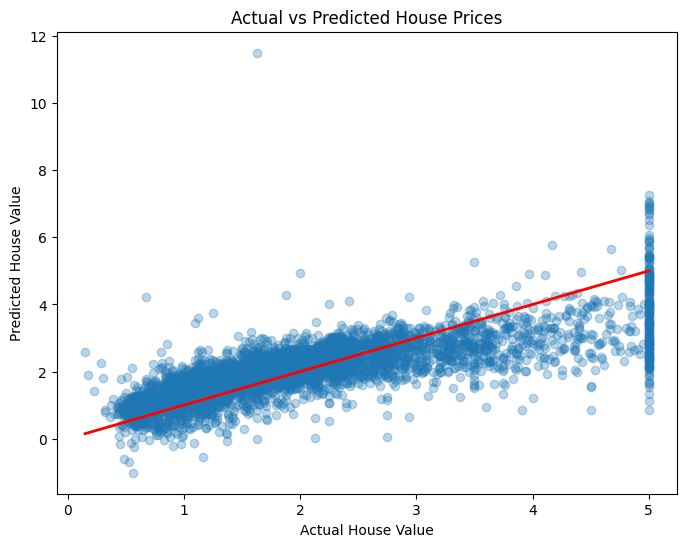

In [9]:
import matplotlib.pyplot as plt

# Plot predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2)  # perfect prediction line
plt.show()

In [10]:
#Save the model
import joblib

# Save the trained model
joblib.dump(model, "house_price_model.pkl")

print("Model saved as house_price_model.pkl")

Model saved as house_price_model.pkl
